In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [12]:
data_path = os.path.join("..", "data", "eda", "combined.csv")
combined = pd.read_csv(data_path)
print(f"Размер данных: {combined.shape}")
combined.head()

Размер данных: (2522362, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
missing_values = combined.isnull().sum()
missing_percent = (missing_values / len(combined)) * 100
missing_report = pd.DataFrame({'Пропущено': missing_values, '%': missing_percent})

print("Пропуски в данных:")
missing_report[missing_report['Пропущено'] > 0].sort_values(by='%', ascending=False)


Пропуски в данных:


,Пропущено,%
Flow Bytes/s,353,0.013995


In [14]:
# Удаляем столбцы с более чем 50% пропусков
threshold = 50
columns_to_drop = missing_report[missing_report['%'] > threshold].index.tolist()
print(f"Удаляем столбцы: {columns_to_drop}")

df_cleaned = combined.drop(columns=columns_to_drop)

# Удаляем строки с пропусками
df_cleaned = df_cleaned.dropna()
print(f"Размер после очистки: {df_cleaned.shape}")


Удаляем столбцы: []
Размер после очистки: (2522009, 79)


In [15]:
save_path = os.path.join("..", "data", "CICIDS2017_cleaned.parquet")
df_cleaned.to_parquet(save_path, index=False)
print(f"Данные сохранены в {save_path}")


Данные сохранены в ..\data\CICIDS2017_cleaned.parquet


In [16]:
data_path = os.path.join("..", "data", "CICIDS2017_cleaned.parquet")
df = pd.read_parquet(data_path)

print(f"Размер данных: {df.shape}")
df.head()


Размер данных: (2522009, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


 Label
BENIGN                        2096134
DoS Hulk                       172846
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


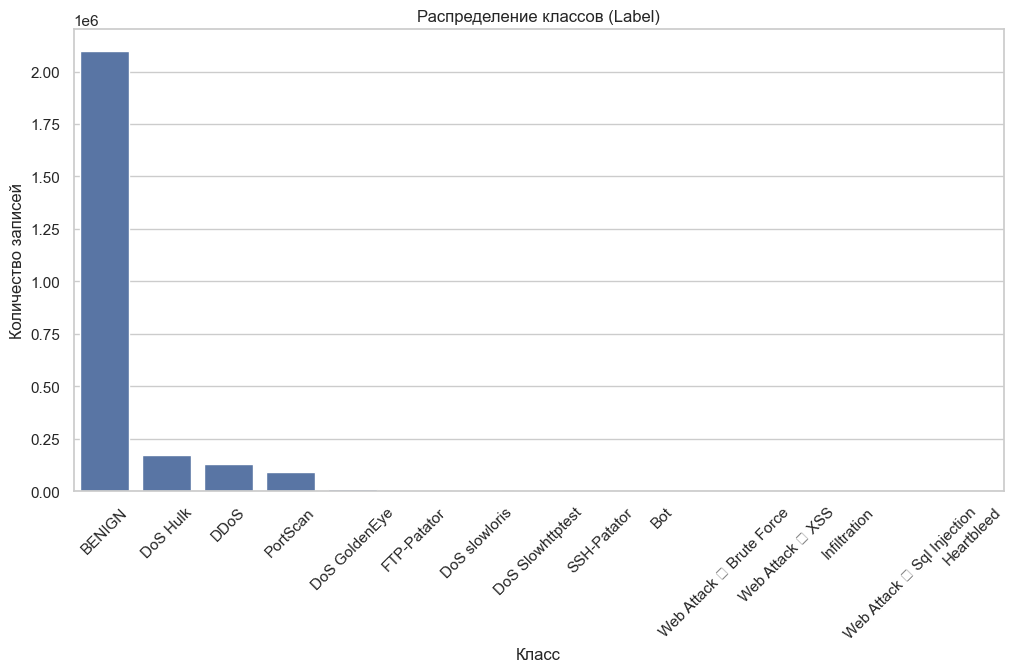

In [17]:
label_counts = df[' Label'].value_counts()
print(label_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=45)
plt.title("Распределение классов (Label)")
plt.ylabel("Количество записей")
plt.xlabel("Класс")
plt.show()


In [18]:
print(df.columns.to_list())

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [19]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
attack_threshold = 6000
label_counts = df['Label'].value_counts()

In [22]:
label_counts

Label
BENIGN                        2096134
DoS Hulk                       172846
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [23]:
major_labels = label_counts[label_counts >= attack_threshold].index.tolist()
major_labels.append('Other_atac')

In [24]:
major_labels

['BENIGN', 'DoS Hulk', 'DDoS', 'PortScan', 'DoS GoldenEye', 'Other_atac']

In [25]:
def consolidate_labels(label):
    if label in major_labels:
        return label
    else:
        return 'Other_Attacks'

In [26]:
df['Label_Processed'] = df['Label'].apply(consolidate_labels)

print(df['Label_Processed'].value_counts())

Label_Processed
BENIGN           2096134
DoS Hulk          172846
DDoS              128016
PortScan           90819
Other_Attacks      23908
DoS GoldenEye      10286
Name: count, dtype: int64


In [27]:
le = LabelEncoder()
df['Label_Encoded'] = le.fit_transform(df['Label_Processed'])

print("Классы и их коды:")
for i, class_ in enumerate(le.classes_):
    print(f"{class_}: {i}")

Классы и их коды:
BENIGN: 0
DDoS: 1
DoS GoldenEye: 2
DoS Hulk: 3
Other_Attacks: 4
PortScan: 5


In [28]:
X = df.drop(columns=['Label', 'Label_Encoded','Label_Processed'])
y = df['Label_Encoded']

In [29]:
print("Пример признаков:")
print(X.head())


Пример признаков:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                 

In [30]:
print("\nКлассы и их числовые коды:")
for i, cls in enumerate(le.classes_):
    print(f"{cls}: {i}")


Классы и их числовые коды:
BENIGN: 0
DDoS: 1
DoS GoldenEye: 2
DoS Hulk: 3
Other_Attacks: 4
PortScan: 5


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [32]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

In [34]:
print(f"Размеры выборок:")
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Размеры выборок:
Train: (1513205, 78), Validation: (504402, 78), Test: (504402, 78)


In [35]:
import numpy as np

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_val.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

for col in X_train.columns:
    median = X_train[col].median()
    X_train[col] = X_train[col].fillna(median)
    X_val[col] = X_val[col].fillna(median)
    X_test[col] = X_test[col].fillna(median)

In [36]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_val_pred = model.predict(X_val_scaled)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Accuracy: 0.998459562016011
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419227
           1       1.00      1.00      1.00     25603
           2       1.00      1.00      1.00      2057
           3       1.00      1.00      1.00     34569
           4       0.99      0.97      0.98      4782
           5       0.99      0.99      0.99     18164

    accuracy                           1.00    504402
   macro avg       1.00      0.99      0.99    504402
weighted avg       1.00      1.00      1.00    504402



In [40]:
y_test_pred = model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9985249860230531
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419227
           1       1.00      1.00      1.00     25603
           2       1.00      0.99      1.00      2057
           3       1.00      1.00      1.00     34569
           4       0.99      0.97      0.98      4782
           5       0.99      0.99      0.99     18164

    accuracy                           1.00    504402
   macro avg       1.00      0.99      0.99    504402
weighted avg       1.00      1.00      1.00    504402



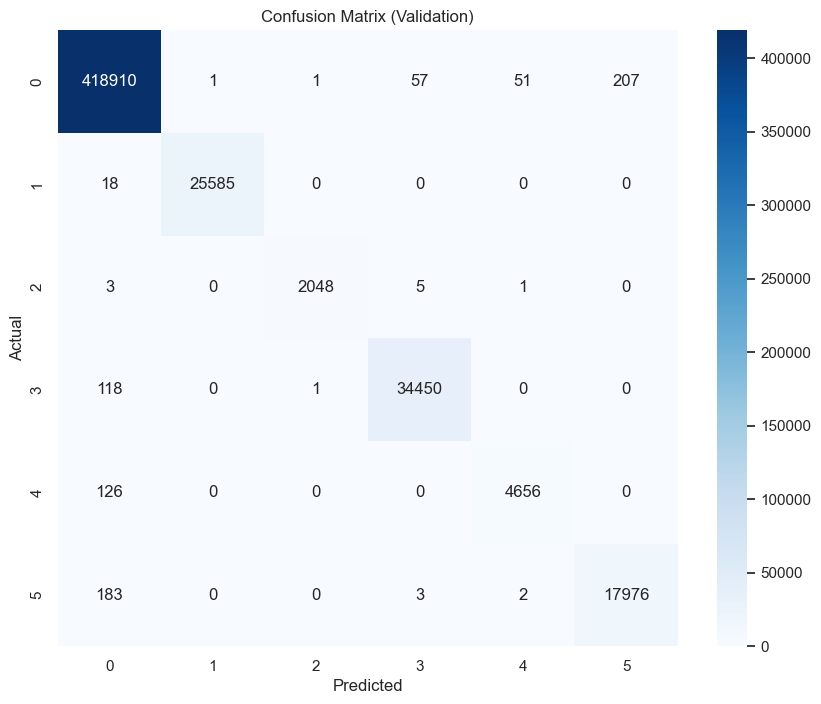

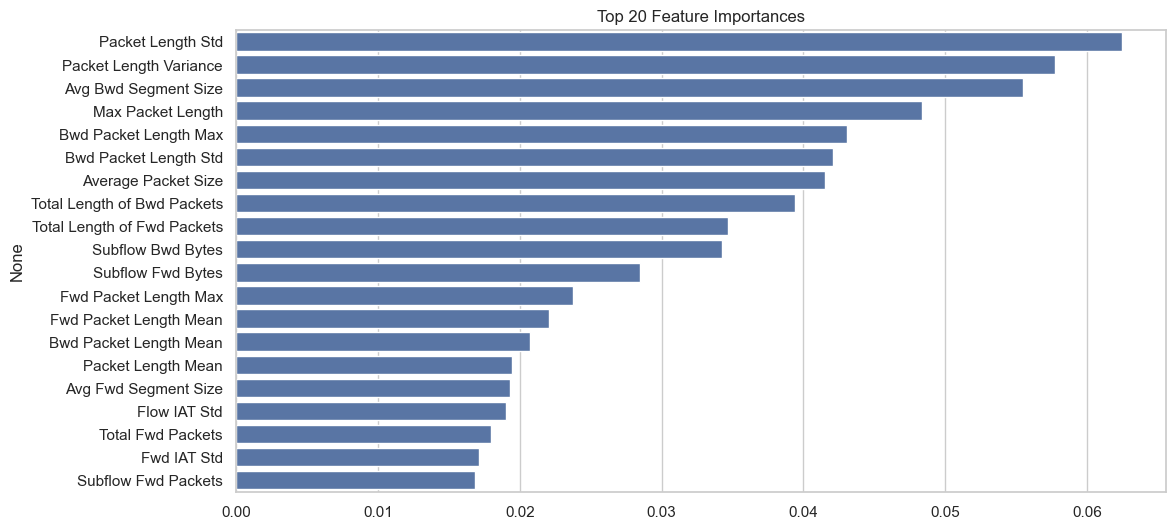

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Предсказания на валидации
y_val_pred = model.predict(X_val_scaled)

# Матрица ошибок
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Важность признаков
importances = model.feature_importances_
features = X_train.columns

# Отсортируем по важности
indices = importances.argsort()[::-1]
plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title('Top 20 Feature Importances')
plt.show()


In [ ]:
import sys

In [42]:
import sys
print(sys.getsizeof(model))

48


In [44]:
import joblib
joblib.dump(model, '../models/soc_model.pkl')

# Сохранение списка фичей для Streamlit
with open('../models/feature_list.txt', 'w') as f:
    f.write(','.join(X.columns.tolist()))